# Diabetes Report
A look into the data of patients along with their insulin and glucose count.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

# Pull diabetes dataset and explore

In [97]:
read_diabetes = pd.read_csv('/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv')
read_diabetes.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [98]:
read_diabetes.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


# Clean the data of outliers in the data

In [99]:
# Replace 0 values with NaN in the specified columns
columns_to_clean = ['BloodPressure', 'Insulin', 'SkinThickness']
read_diabetes[columns_to_clean] = read_diabetes[columns_to_clean].replace(0, np.nan)

# Drop rows with NaN values in the specified columns
read_diabetes.dropna(subset=columns_to_clean, inplace=True)

# Reset the index after dropping rows
read_diabetes.reset_index(drop=True, inplace=True)

# Visualizing the data

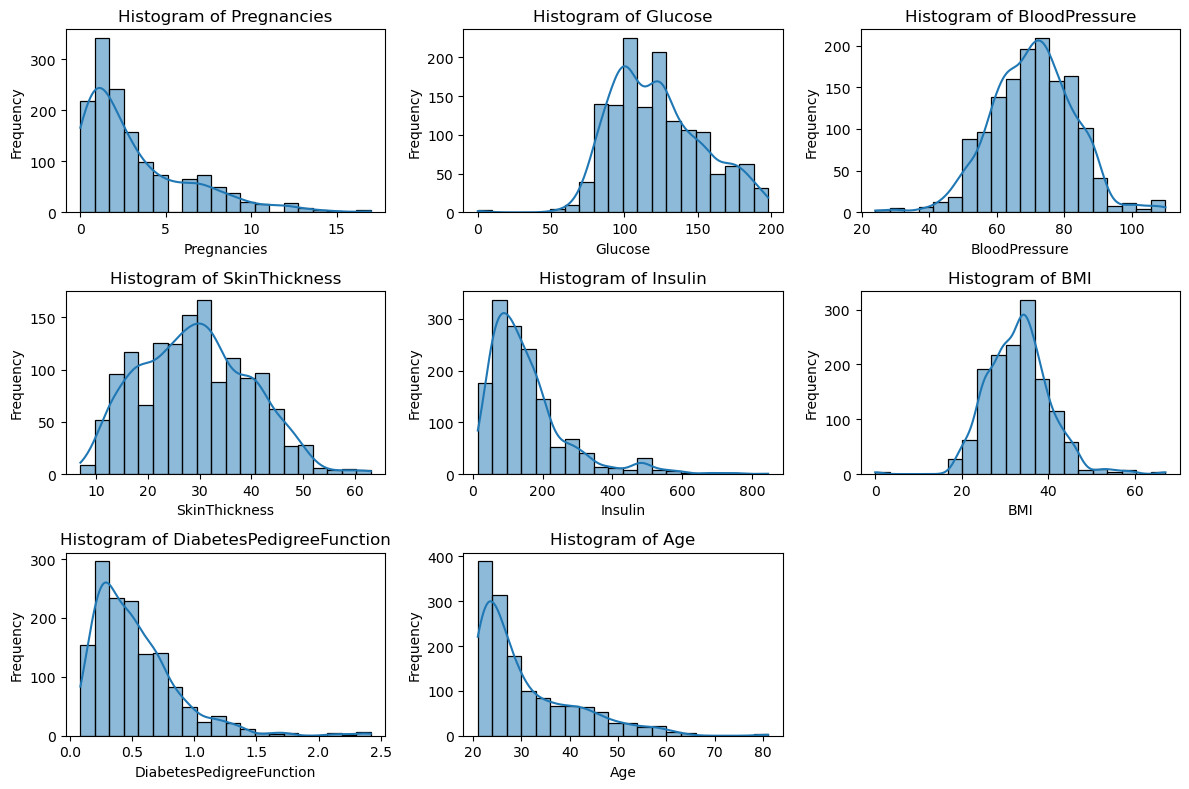

In [100]:
# Select numerical features for the histogram
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Create histograms for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create a grid of 3x3 plots
    sns.histplot(read_diabetes[feature], bins=20, kde=True)  # Create the histogram
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

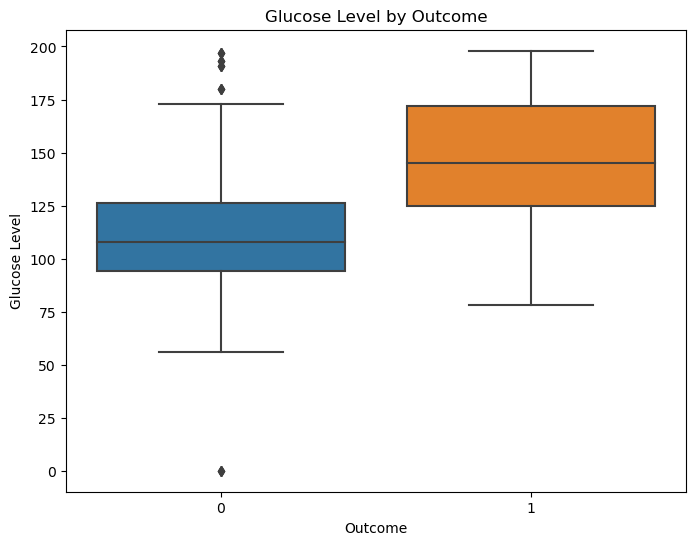

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=read_diabetes)
plt.title('Glucose Level by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose Level')
plt.show()

/tmp/ipykernel_33/2185684575.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=age_bins, y='Outcome', data=read_diabetes, ci=None)


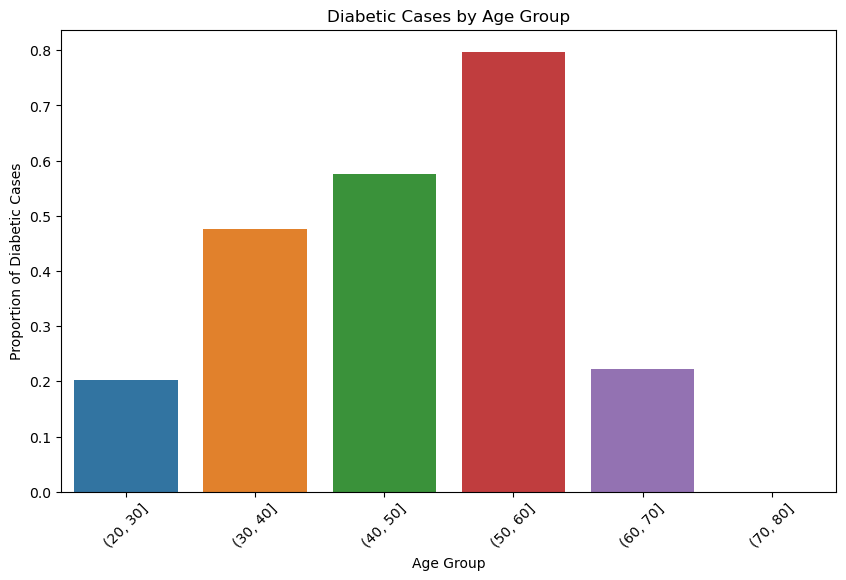

In [102]:
# Define age bins
age_bins = pd.cut(read_diabetes['Age'], bins=[20, 30, 40, 50, 60, 70, 80])

# Bar Plot of Diabetic Cases by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_bins, y='Outcome', data=read_diabetes, ci=None)
plt.title('Diabetic Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Diabetic Cases')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

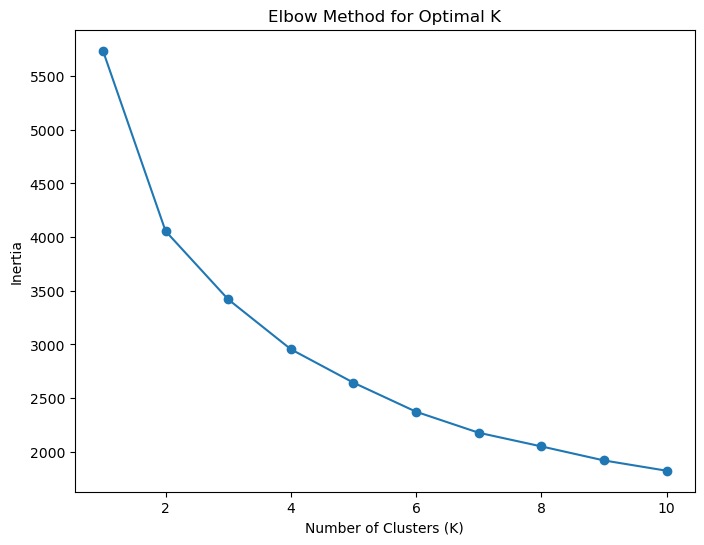

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


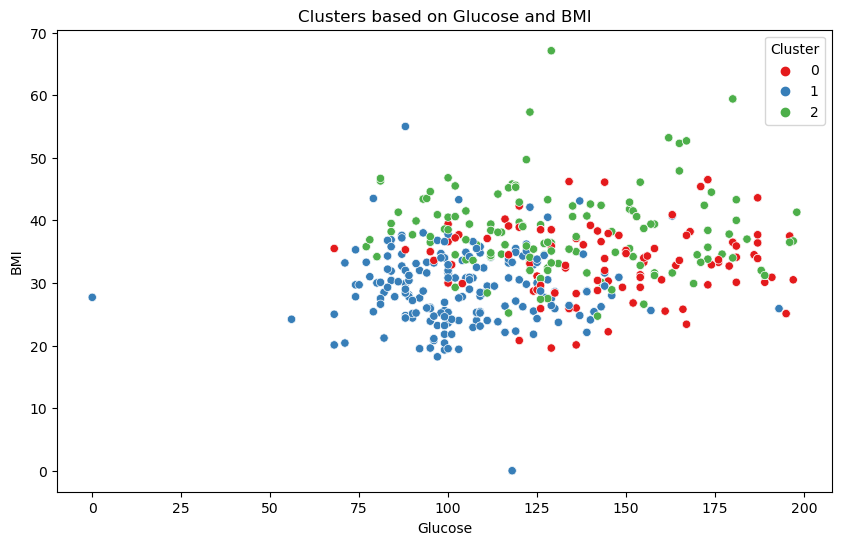

In [103]:
# Select the features for clustering
features_for_clustering = ['Glucose', 'BloodPressure', 'BMI', 'Age']

# Standardize the features
scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(read_diabetes[features_for_clustering])

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# Add the cluster labels to the DataFrame
read_diabetes['Cluster'] = clusters

# Plot the clusters based on two features (e.g., Glucose and BMI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Cluster', data=read_diabetes, palette='Set1')
plt.title('Clusters based on Glucose and BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

